**Name**: Aditya Gujar  
**Reg no.**: 2448505    
**Subject**: Natural Language Processing  
**Date**: 05-02-2025    
**Practical-2 (Text-Processing and Analysis)**

In [2]:
import re
import string
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
text = "AI-driven financial portfolio optimization is a game-changer! I, Aditya, born on 27-March-2000, am deeply interested in this field. My email is adityagujar20@gmail.com and phone number is 9876543210. Don't underestimate the power of machine learning in portfolio management. With algorithmic trading, risk assessment & asset allocation, we can maximize returns. AI can adapt to market trends dynamically—this is the future!"

## **a. Count Unique Tokens**  
### **Definition**  
Tokens are individual words or punctuation marks extracted from a text. Unique tokens refer to the distinct words present in the text.  
### **Objective**  
Count the number of unique tokens to analyze the vocabulary richness of the text.  

In [4]:
tokens = word_tokenize(text)
unique_tokens = set(tokens)
print("Unique Tokens Count:", len(unique_tokens))

Unique Tokens Count: 58


## **b. Count Punctuation Characters and Remove Them**  
### **Definition**  
Punctuation marks (e.g., `.,!?;`) are removed to clean the text for better processing in NLP tasks.  

### **Objective**  
- Identify and count punctuation marks in the text.  
- Remove punctuation to ensure better tokenization and text analysis.  


In [5]:
punct_count = sum(1 for char in text if char in string.punctuation)
text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
print("Punctuation Count:", punct_count)

Punctuation Count: 19


## **c. Plot Stopword Distribution**  
### **Definition**  
Stopwords are common words (e.g., "the", "is", "in") that are usually filtered out as they don’t contribute much to meaning.  
### **Objective**  
- Identify and count stopwords in the text.  
- Visualize the frequency of stopwords using a bar plot.  


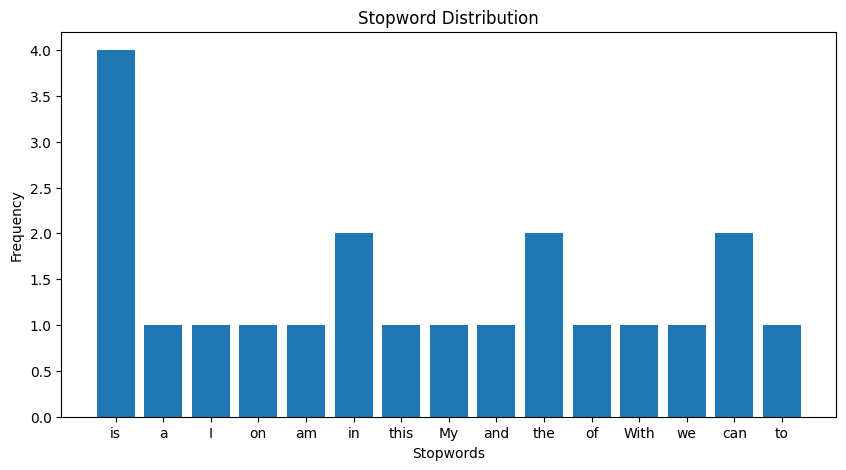

In [6]:
stop_words = set(stopwords.words('english'))
tokens_no_punct = word_tokenize(text_no_punct)
stopword_freq = Counter([word for word in tokens_no_punct if word.lower() in stop_words])
plt.figure(figsize=(10,5))
plt.bar(stopword_freq.keys(), stopword_freq.values())
plt.xlabel("Stopwords")
plt.ylabel("Frequency")
plt.title("Stopword Distribution")
plt.show()

## **d. Remove Stopwords**  
### **Definition**  
Stopwords are removed to improve text representation and reduce noise in NLP models.  

### **Objective**  
- Filter out stopwords from the text.  
- Retain only meaningful words that contribute to the overall context.  


In [7]:
filtered_tokens = [word for word in tokens_no_punct if word.lower() not in stop_words]
filtered_text = " ".join(filtered_tokens)
filtered_text

'AIdriven financial portfolio optimization gamechanger Aditya born 27March2000 deeply interested field email adityagujar20gmailcom phone number 9876543210 Dont underestimate power machine learning portfolio management algorithmic trading risk assessment asset allocation maximize returns AI adapt market trends dynamically—this future'


## **e. POS (Part-of-Speech) Tagging and Distribution**  
### **Definition**  
POS tagging assigns grammatical categories (e.g., Noun, Verb, Adjective) to words.  

### **Objective**  
- Identify the role of each word in the sentence.  
- Count occurrences of different POS tags.  
- Visualize POS tag distribution using a bar plot.  


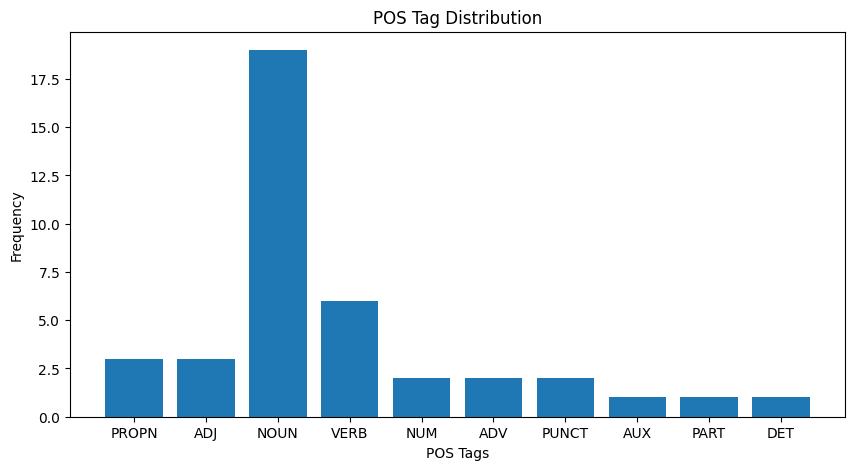

In [8]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(filtered_text)
pos_counts = Counter([token.pos_ for token in doc])
plt.figure(figsize=(10,5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("POS Tag Distribution")
plt.show()

## **f. Count Unique Lemmas**  
### **Definition**  
Lemmatization reduces words to their root form (e.g., "running" → "run").  

### **Objective**  
- Extract and count unique lemmas in the text.  
- Understand word diversity by identifying root words.  


In [9]:
lemmas = set([token.lemma_ for token in doc])
print("Unique Lemmas Count:", len(lemmas))

Unique Lemmas Count: 39


## **g. Frequency Distribution of Top 10 Words**  
### **Definition**  
A frequency distribution shows how often words appear in the text.  

### **Objective**  
- Identify the most frequently occurring words.  
- Plot the top 10 words using a bar chart for better visualization.  


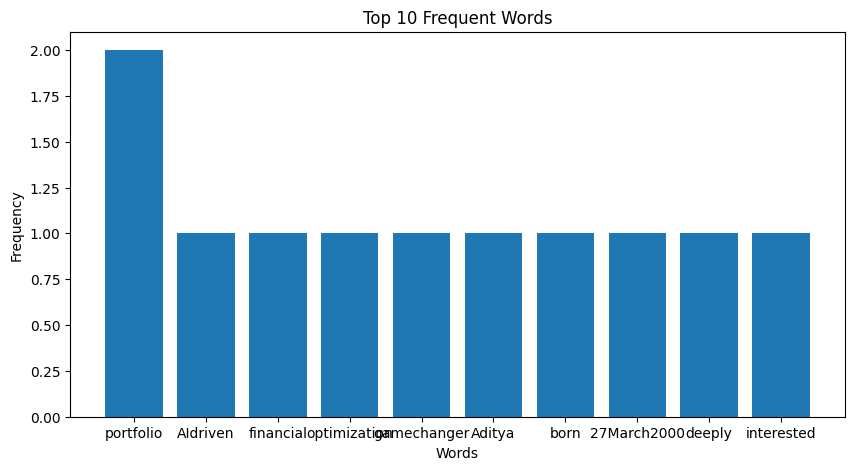

In [10]:
word_freq = Counter(filtered_tokens)
most_common = word_freq.most_common(10)
plt.figure(figsize=(10,5))
plt.bar([word[0] for word in most_common], [word[1] for word in most_common])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Frequent Words")
plt.show()

## **h. Unique Bigrams, Trigrams, and Quadgrams**  
### **Definition**  
N-grams are continuous sequences of `n` words from the text:  
- **Bigrams** (2-word sequences) → "machine learning"  
- **Trigrams** (3-word sequences) → "deep learning models"  
- **Quadgrams** (4-word sequences) → "artificial intelligence applications"  

### **Objective**  
- Count the number of unique bigrams, trigrams, and quadgrams.  
- Identify common multi-word phrases in the text.  


In [11]:
bigrams = list(ngrams(filtered_tokens, 2))
trigrams = list(ngrams(filtered_tokens, 3))
quadgrams = list(ngrams(filtered_tokens, 4))
print("Unique Bigrams:", len(set(bigrams)))
print("Unique Trigrams:", len(set(trigrams)))
print("Unique Quadgrams:", len(set(quadgrams)))

Unique Bigrams: 36
Unique Trigrams: 35
Unique Quadgrams: 34


## **i. Convert Date Format**  
### **Definition**  
Dates are extracted and reformatted to ensure consistency.  

### **Objective**  
- Identify and extract dates from the text.  
- Convert them into a standardized format (e.g., `27-March-2000` → `27-03-2000`).  


In [12]:
dates = re.findall(r'\d{1,2}-[A-Za-z]+-\d{4}', text)
date_converted = [re.sub(r'(\d{1,2})-([A-Za-z]+)-(\d{4})', r'\1-\2-\3', date) for date in dates]
print("Converted Dates:", date_converted)

Converted Dates: ['27-March-2000']


## **j. Plot Year Distribution**  
### **Definition**  
Extracted years from dates are visualized to see their distribution in the text.  

### **Objective**  
- Identify and count occurrences of different years.  
- Visualize the distribution of years using a bar plot.  


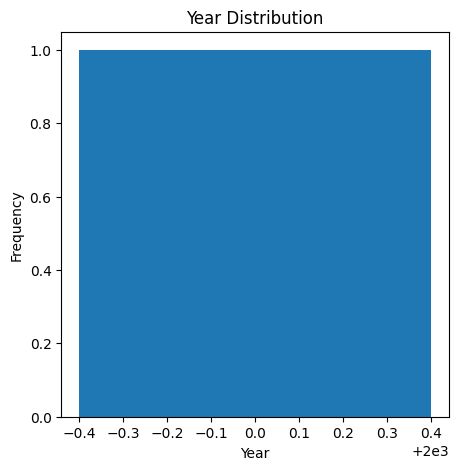

In [13]:
years = [int(re.search(r'\d{4}', date).group()) for date in date_converted]
year_counts = Counter(years)
plt.figure(figsize=(5,5))
plt.bar(year_counts.keys(), year_counts.values())
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Year Distribution")
plt.show()

## **k. Validate Phone Numbers**  
### **Definition**  
Extracted phone numbers are checked for validity based on length and numeric format.  

### **Objective**  
- Identify and extract phone numbers from the text.  
- Ensure valid phone numbers are retained while invalid ones are removed.  


In [14]:
phone_numbers = re.findall(r'\b\d{10}\b', text)
valid_phones = [num for num in phone_numbers if len(num) == 10 and num.isdigit()]
print("Valid Phone Numbers:", valid_phones)

Valid Phone Numbers: ['9876543210']


| **Operation** | **Objective** | **Code Explanation** |
|---------------|---------------|----------------------|
| **a. Count Unique Tokens** | Count the number of unique tokens in the text. | Tokenizes the text and converts the tokens into a set to ensure uniqueness. |
| **b. Count Punctuation Characters and Remove Them** | Identify and count punctuation marks in the text. Remove punctuation for better analysis. | Counts punctuation marks using string.punctuation and removes them using `str.translate()`. |
| **c. Plot Stopword Distribution** | Visualize the distribution of stopwords in the text. | Identifies and counts stopwords from NLTK and visualizes them using `matplotlib`. |
| **d. Remove Stopwords** | Filter out stopwords to focus on meaningful words. | Removes stopwords using NLTK’s stopwords list, leaving only relevant tokens. |
| **e. POS Tagging and Distribution** | Assign POS tags to words and analyze the frequency of each tag. | Uses `spaCy` to perform POS tagging and `matplotlib` to plot tag distributions. |
| **f. Count Unique Lemmas** | Identify the number of unique lemmas in the text. | Extracts lemmatized words from the text using `spaCy` and counts the unique lemmas. |
| **g. Frequency Distribution of Top 10 Words** | Identify and visualize the most frequent words in the text. | Creates a frequency distribution using `Counter` and plots the top 10 words with `matplotlib`. |
| **h. Unique Bigrams, Trigrams, and Quadgrams** | Count unique bigrams, trigrams, and quadgrams in the text. | Generates bigrams, trigrams, and quadgrams using `nltk.util.ngrams()` and counts their uniqueness. |
| **i. Convert Date Format** | Extract and standardize the date format. | Uses regex to extract dates and reformats them into `DD-MM-YYYY` format. |
| **j. Plot Year Distribution** | Visualize the distribution of years in the text. | Extracts years from the date strings and plots their frequency distribution. |
| **k. Validate Phone Numbers** | Extract and validate phone numbers in the text. | Extracts phone numbers using regex and validates them by ensuring correct length and numeric format. |